In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [164]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined.csv"
df = pd.read_csv(path)
df = shuffle(df)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
40,40,1.218015,2.396709,1.840196,2.506328,0.975956,0.953633,0.960503,0.950487,0.816499,0.809444,0.812680,0.809031,0.970089,0.941322,0.954809,0.938638,Fresh Papaya Leaf
208,44,3.042160,3.826191,2.957516,3.917036,0.876522,0.847749,0.877513,0.849631,0.539117,0.525143,0.539245,0.526765,0.876140,0.844246,0.879595,0.840548,Papaya Ringspot
295,60,3.380070,4.558308,2.638603,3.647136,0.853104,0.817520,0.880878,0.841012,0.498458,0.479723,0.513239,0.492103,0.865748,0.818808,0.895211,0.855036,Powdery Mildew
181,17,1.555125,2.004914,1.527887,2.108155,0.890190,0.862340,0.892564,0.856154,0.521087,0.505149,0.522462,0.501611,0.888501,0.856285,0.890457,0.848884,Papaya Ringspot
225,61,4.854586,6.639982,5.167231,6.132105,0.833174,0.787561,0.822901,0.799990,0.494128,0.471251,0.488843,0.477426,0.842228,0.784261,0.832117,0.800761,Papaya Ringspot


In [165]:
df.shape

(300, 18)

In [166]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.156667,2.725250,3.964152,2.894745,3.988170,0.874993,0.826479,0.864919,0.825536,0.554908,0.531077,0.549496,0.530647,0.875815,0.819681,0.868248,0.818480
std,18.396019,1.505644,1.912704,1.510441,1.933513,0.064100,0.077793,0.063389,0.078101,0.091796,0.099676,0.093070,0.099853,0.070219,0.094992,0.074410,0.095796
min,0.000000,0.346431,0.548143,0.308241,0.540500,0.659733,0.573734,0.687297,0.574022,0.422612,0.380173,0.408012,0.380257,0.676359,0.547296,0.613650,0.525650
25%,14.750000,1.761535,2.659123,1.869761,2.779239,0.836898,0.774981,0.824198,0.770923,0.496065,0.465686,0.489574,0.466993,0.831323,0.748813,0.822253,0.746914
50%,29.500000,2.611336,3.775940,2.746002,3.776702,0.875113,0.816600,0.854236,0.813477,0.523860,0.494223,0.513619,0.490514,0.876752,0.815954,0.867870,0.813838
75%,44.250000,3.421791,5.045140,3.803768,5.074995,0.916474,0.879702,0.907919,0.874433,0.575476,0.559789,0.576470,0.562494,0.925883,0.891737,0.927328,0.891952
max,70.000000,9.969792,11.980202,9.313826,11.759734,0.986732,0.975977,0.984434,0.974249,0.830710,0.825573,0.831060,0.825821,0.986114,0.977175,0.988594,0.980172


In [167]:
df = df.rename(columns={'16': 'Class'})
X = df.drop('Class',axis=1)
y = df['Class']

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 40 to 194
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   0           300 non-null    float64
 2   1           300 non-null    float64
 3   2           300 non-null    float64
 4   3           300 non-null    float64
 5   4           300 non-null    float64
 6   5           300 non-null    float64
 7   6           300 non-null    float64
 8   7           300 non-null    float64
 9   8           300 non-null    float64
 10  9           300 non-null    float64
 11  10          300 non-null    float64
 12  11          300 non-null    float64
 13  12          300 non-null    float64
 14  13          300 non-null    float64
 15  14          300 non-null    float64
 16  15          300 non-null    float64
 17  Class       300 non-null    object 
dtypes: float64(16), int64(1), object(1)
memory usage: 44.5+ KB


Text(0.5, 1.0, 'Correlation between different fearures')

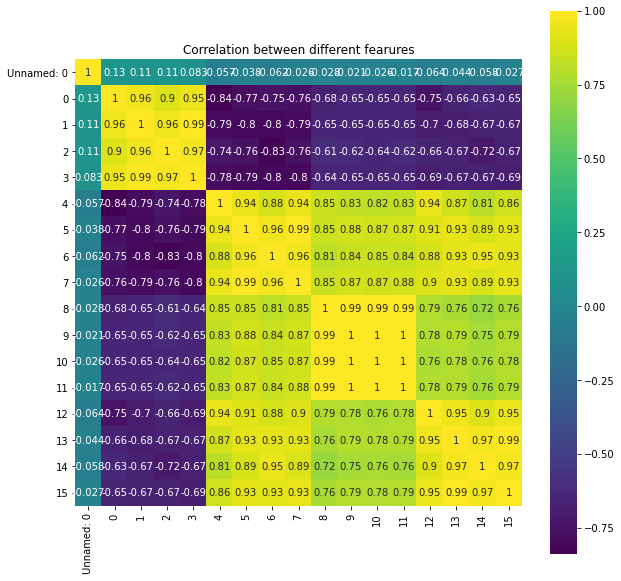

In [169]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [170]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
40,40,1.218015,2.396709,1.840196,2.506328,0.975956,0.953633,0.960503,0.950487,0.816499,0.809444,0.812680,0.809031,0.970089,0.941322,0.954809,0.938638
208,44,3.042160,3.826191,2.957516,3.917036,0.876522,0.847749,0.877513,0.849631,0.539117,0.525143,0.539245,0.526765,0.876140,0.844246,0.879595,0.840548
295,60,3.380070,4.558308,2.638603,3.647136,0.853104,0.817520,0.880878,0.841012,0.498458,0.479723,0.513239,0.492103,0.865748,0.818808,0.895211,0.855036
181,17,1.555125,2.004914,1.527887,2.108155,0.890190,0.862340,0.892564,0.856154,0.521087,0.505149,0.522462,0.501611,0.888501,0.856285,0.890457,0.848884
225,61,4.854586,6.639982,5.167231,6.132105,0.833174,0.787561,0.822901,0.799990,0.494128,0.471251,0.488843,0.477426,0.842228,0.784261,0.832117,0.800761


In [171]:
y.head()

40     Fresh Papaya Leaf
208      Papaya Ringspot
295       Powdery Mildew
181      Papaya Ringspot
225      Papaya Ringspot
Name: Class, dtype: object

# Feature Scaling

In [172]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
  
scaler = MaxAbsScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)

In [173]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.571429,0.122171,0.200056,0.197577,0.213128,0.989079,0.977106,0.975691,0.975609,0.982893,0.980464,0.977884,0.979668,0.983749,0.963309,0.965826,0.957626
1,0.628571,0.305138,0.319376,0.317540,0.333089,0.888308,0.868615,0.891389,0.872088,0.648983,0.636095,0.648864,0.637868,0.888478,0.863966,0.889743,0.857551
2,0.857143,0.339031,0.380487,0.283300,0.310138,0.864575,0.837642,0.894807,0.863241,0.600038,0.581078,0.617572,0.595895,0.877940,0.837933,0.905540,0.872333
3,0.242857,0.155984,0.167352,0.164045,0.179269,0.902160,0.883566,0.906678,0.878784,0.627279,0.611877,0.628670,0.607408,0.901013,0.876286,0.900731,0.866056
4,0.871429,0.486929,0.554246,0.554791,0.521449,0.844378,0.806947,0.835914,0.821134,0.594826,0.570816,0.588216,0.578123,0.854088,0.802580,0.841717,0.816960


In [174]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      X, y , test_size = 0.35, random_state=None)

X_train.shape, X_test.shape


((195, 17), (105, 17))

In [175]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
287,0.614286,0.280051,0.299945,0.294688,0.310960,0.841359,0.817560,0.856774,0.815379,0.610409,0.594267,0.619601,0.591764,0.832245,0.787107,0.833853,0.780537
154,0.571429,0.197484,0.288057,0.292944,0.322688,0.911783,0.842684,0.865757,0.830927,0.643814,0.599342,0.613050,0.591462,0.912774,0.843933,0.871428,0.823534
39,0.800000,0.320207,0.417246,0.352365,0.434798,0.866120,0.781774,0.839090,0.780289,0.604914,0.551653,0.585844,0.549782,0.843494,0.753875,0.836865,0.745417
70,0.642857,0.405032,0.549494,0.726949,0.666225,0.834603,0.763914,0.752934,0.735943,0.591662,0.550698,0.544595,0.534516,0.844253,0.744130,0.727951,0.688932
142,0.900000,0.238588,0.255729,0.185840,0.252907,0.951966,0.950552,0.967039,0.954368,0.752305,0.749982,0.758720,0.750589,0.968534,0.964229,0.978491,0.963004


# Model training

## KNN

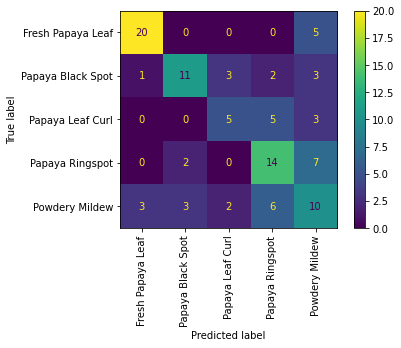

In [176]:
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [177]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.83      0.80      0.82        25
Papaya Black Spot       0.69      0.55      0.61        20
 Papaya Leaf Curl       0.50      0.38      0.43        13
  Papaya Ringspot       0.52      0.61      0.56        23
   Powdery Mildew       0.36      0.42      0.38        24

         accuracy                           0.57       105
        macro avg       0.58      0.55      0.56       105
     weighted avg       0.59      0.57      0.58       105



In [178]:
from sklearn import metrics
error_rate = []
scores = []

k=50
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

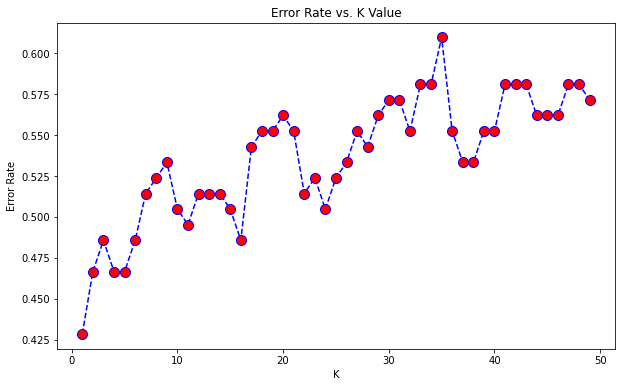

In [179]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

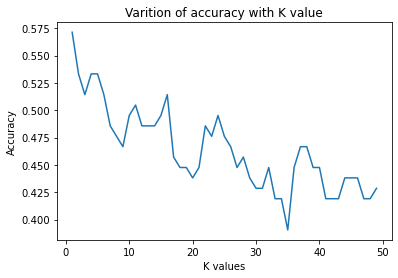

In [180]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [181]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.83      0.80      0.82        25
Papaya Black Spot       0.69      0.55      0.61        20
 Papaya Leaf Curl       0.50      0.38      0.43        13
  Papaya Ringspot       0.52      0.61      0.56        23
   Powdery Mildew       0.36      0.42      0.38        24

         accuracy                           0.57       105
        macro avg       0.58      0.55      0.56       105
     weighted avg       0.59      0.57      0.58       105

Accuracy for k = 1 is 57.14285714285714%


## Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))



                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.75      0.84      0.79        25
Papaya Black Spot       0.41      0.35      0.38        20
 Papaya Leaf Curl       1.00      0.15      0.27        13
  Papaya Ringspot       0.44      0.17      0.25        23
   Powdery Mildew       0.43      0.88      0.58        24

         accuracy                           0.52       105
        macro avg       0.61      0.48      0.45       105
     weighted avg       0.58      0.52      0.48       105



In [183]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 52.3810%


## Logistic regression

In [184]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model
lr.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))


                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.75      0.84      0.79        25
Papaya Black Spot       0.41      0.35      0.38        20
 Papaya Leaf Curl       1.00      0.15      0.27        13
  Papaya Ringspot       0.44      0.17      0.25        23
   Powdery Mildew       0.43      0.88      0.58        24

         accuracy                           0.52       105
        macro avg       0.61      0.48      0.45       105
     weighted avg       0.58      0.52      0.48       105



In [185]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 52.3810%


# K-Fold Cross Validation

In [186]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1


Fold:1, Train set: 225, Test set:75
Fold:2, Train set: 225, Test set:75
Fold:3, Train set: 225, Test set:75
Fold:4, Train set: 225, Test set:75


In [187]:
score = cross_val_score(lr, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Logistic Regression: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.54666667 0.50666667 0.41333333 0.34666667]
Model accuracy score for Logistic Regression: 45.3333%


In [188]:
score = cross_val_score(gnb, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Gaussian Naive Bayes: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.50666667 0.46666667 0.44       0.4       ]
Model accuracy score for Gaussian Naive Bayes: 45.3333%
